# website data analysis

### in this project we analysis the website and see how much customer came direct and how many come by referance

### here is some question that we solved in this project

1) What patterns or trends can you observe in website sessions and users over time?

2) Which marketing channel brought the highest number of users to the website, and how can we use this insight to improve traffic from other sources?

3) Which channel has the highest average engagement time, and what does that tell us about user behavior and content effectiveness?

4) How does engagement rate vary across different traffic channels?

5) Which channels are driving more engaged sessions compared to non-engaged ones, and what strategies can improve engagement in underperforming channels?

6) At what hours of the day does each channel drive the most traffic?

7) Is there any correlation between high traffic (sessions) and high engagement rate over time?


# first we import some libarary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("data-export (1).csv")

In [3]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


## as we can see there column name is not proper in formet so we rename this as we want

In [7]:
df.columns = df.iloc[0]
df = df.drop(index = 0).reset_index(drop = True)
df.columns = ["channel group", "DateHour", "User", "Sessions","Engaged sessions", "Average engagement time per session", "Engaged sessions per user", "Events per session","Engagement rate", "Event count"]

In [8]:
df.head()

,channel group,DateHour,User,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
1,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
2,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
3,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
4,Organic Social,2024041721,160,206,103,59.31553398058250,0.64375,4.694174757281550,0.5,967


## now check the data info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channel group                        3181 non-null   object
 1   DateHour                             3181 non-null   object
 2   User                                 3181 non-null   object
 3   Sessions                             3181 non-null   object
 4   Engaged sessions                     3181 non-null   object
 5   Average engagement time per session  3181 non-null   object
 6   Engaged sessions per user            3181 non-null   object
 7   Events per session                   3181 non-null   object
 8   Engagement rate                      3181 non-null   object
 9   Event count                          3181 non-null   object
dtypes: object(10)
memory usage: 248.6+ KB


## as we can see thies as are object data type, so we need to change it

In [17]:
df["DateHour"] = pd.to_datetime(df["DateHour"], format="%Y%m%d%H", errors='coerce')
df.head()

,channel group,DateHour,User,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
1,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
2,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
3,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001
4,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967


In [18]:
numeric_cols = df.columns.drop(["channel group", "DateHour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df["Hour"] = df["DateHour"].dt.hour

In [19]:
df.head()

,channel group,DateHour,User,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
1,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
2,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
3,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
4,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3181 non-null   object        
 1   DateHour                             3181 non-null   datetime64[ns]
 2   User                                 3181 non-null   int64         
 3   Sessions                             3181 non-null   int64         
 4   Engaged sessions                     3181 non-null   int64         
 5   Average engagement time per session  3181 non-null   float64       
 6   Engaged sessions per user            3181 non-null   float64       
 7   Events per session                   3181 non-null   float64       
 8   Engagement rate                      3181 non-null   float64       
 9   Event count                          3181 non-null   int64         
 10  Hour        

In [21]:
df.describe()

,User,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000
mean,41.874568,51.114429,28.289217,66.650591,0.606449,4.675970,0.503404,241.907891,11.803521
std,29.383942,36.661139,20.551668,127.220206,0.264064,2.795667,0.228241,183.318978,6.884907
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,20.000000,24.000000,13.000000,32.097378,0.561404,3.750000,0.442857,103.000000,6.000000
50%,42.000000,51.000000,27.000000,49.040404,0.666667,4.410256,0.545455,226.000000,12.000000
75%,60.000000,71.000000,41.000000,71.500000,0.750000,5.218182,0.633333,339.000000,18.000000
max,208.000000,267.000000,132.000000,4525.000000,2.000000,56.000000,1.000000,1147.000000,23.000000


# naw our data is ready to analysis

# sessions and user over time

In [22]:
sns.set(style="whitegrid")

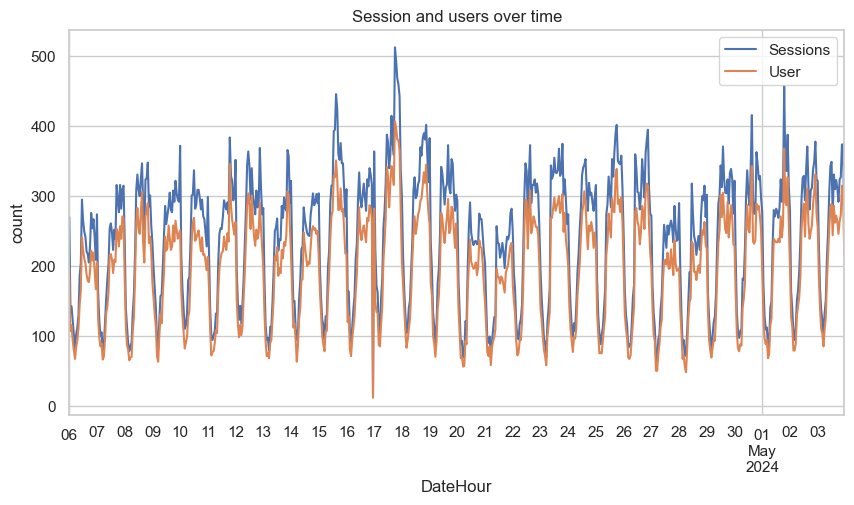

In [25]:
plt.figure(figsize=(10,5))
df.groupby("DateHour")[["Sessions","User"]].sum().plot(ax=plt.gca())
plt.title("Session and users over time")
plt.xlabel("DateHour")
plt.ylabel("count")
plt.show()

# total users by channel

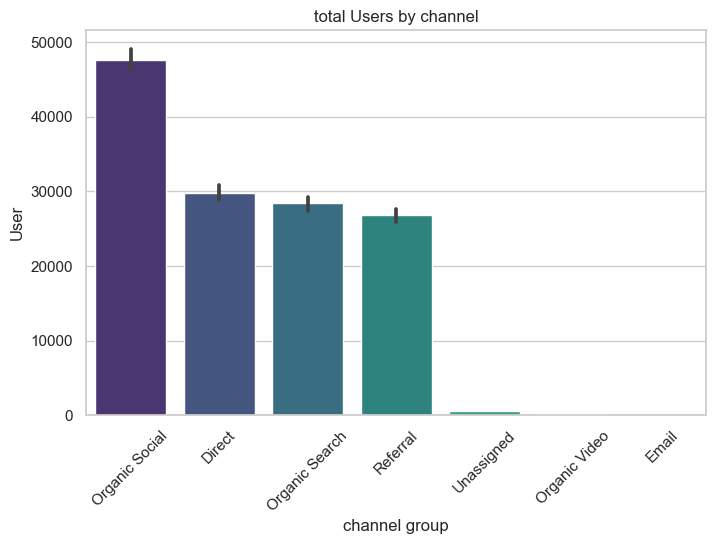

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="channel group", y="User", estimator=np.sum, palette="viridis")
plt.title("total Users by channel")
plt.xticks(rotation=45)
plt.show()

# Average engagement time by channel  

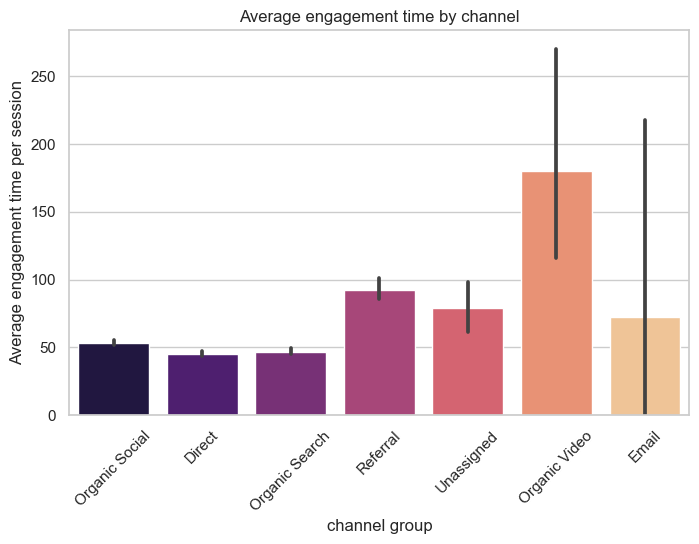

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="channel group", y="Average engagement time per session", estimator=np.mean, palette="magma")
plt.title("Average engagement time by channel")
plt.xticks(rotation=45)
plt.show()

In [30]:
df.head()

,channel group,DateHour,User,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
1,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
2,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
3,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
4,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21


# Engagement Rate distribution by channel

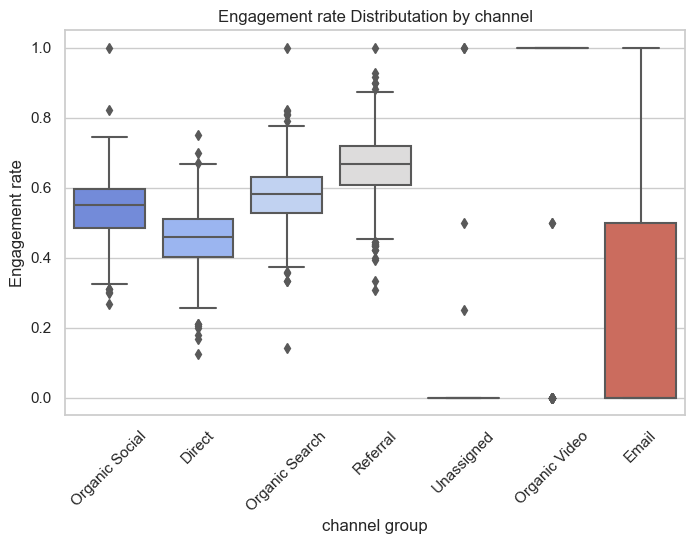

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="channel group", y="Engagement rate", palette="coolwarm")
plt.title("Engagement rate Distributation by channel")
plt.xticks(rotation=45)
plt.show()

# Engaged vs non-engaged sassions

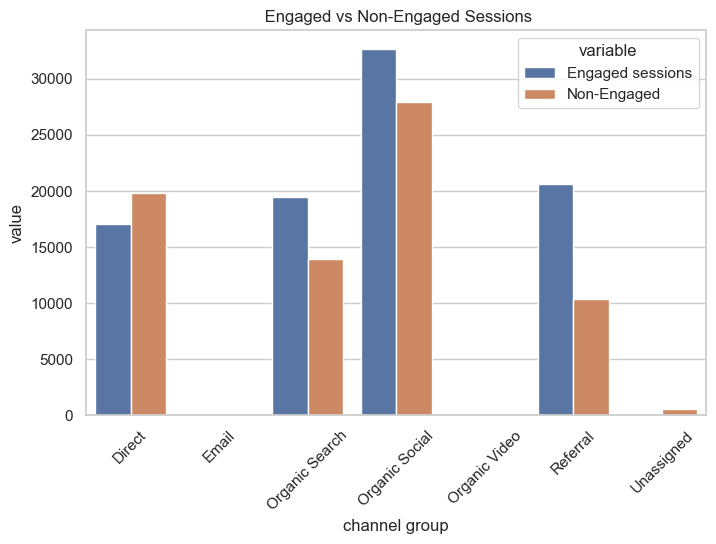

In [46]:
session_df = df.groupby("channel group") [["Sessions", "Engaged sessions"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Engaged sessions"]
session_df_melted = session_df.melt(id_vars="channel group", value_vars= ["Engaged sessions", "Non-Engaged"])

plt.figure(figsize=(8, 5))
sns.barplot(data=session_df_melted, x="channel group", y="value", hue="variable")
plt.title(" Engaged vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()

# traffic by hour and channel

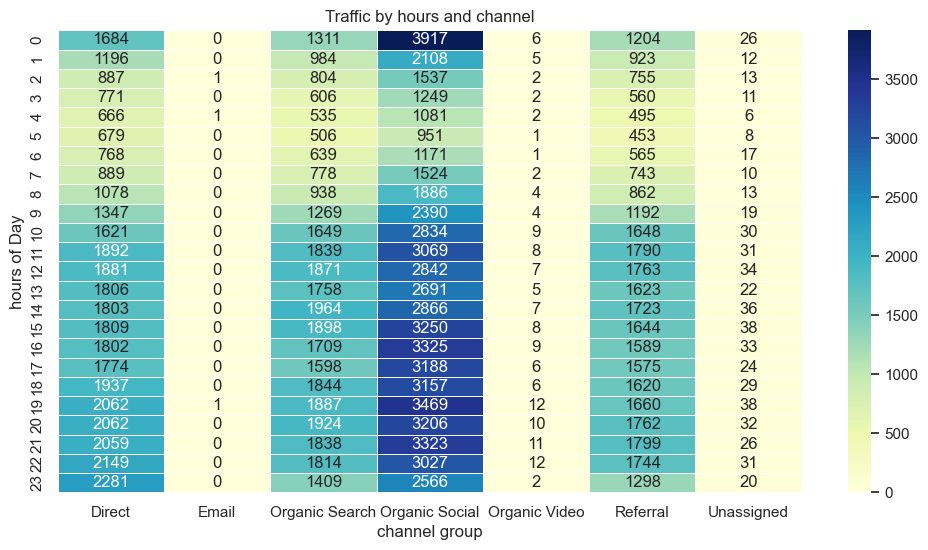

In [49]:
heatmap_data = df.groupby(["Hour", "channel group"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt='.0f')
plt.title("Traffic by hours and channel")
plt.xlabel("channel group")
plt.ylabel("hours of Day")
plt.show()

# engagement rate and session over time

In [50]:
df.head()

,channel group,DateHour,User,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
1,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
2,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
3,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
4,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21


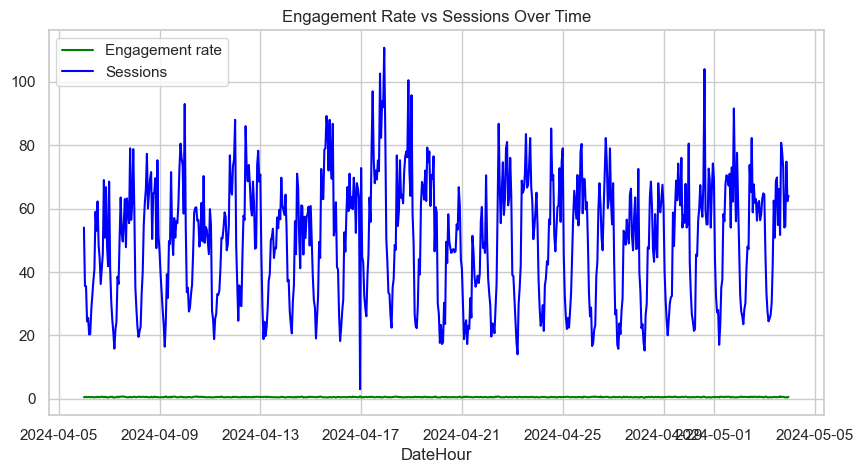

In [55]:
df_plot = df.groupby("DateHour")[["Engagement rate", "Sessions"]].mean().reset_index()


plt.figure(figsize=(10, 5))
plt.plot(df_plot["DateHour"], df_plot["Engagement rate"], label="Engagement rate", color="green")
plt.plot(df_plot ["DateHour"], df_plot["Sessions"], label="Sessions", color="blue")
plt.title("Engagement Rate vs Sessions Over Time")
plt.xlabel("DateHour")
plt.legend()
plt.grid(True)
plt.show()